# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a simple dimensionality reduction technique that can capture linear correlations between the features. For a given (standardized) data, PCA can be calculated by eigenvalue decomposition of covariance (or correlation) matrix of the data, or Singular Value Decomposition (SVD) of the data matrix. The data standardization includes mean removal and variance normalization.

## Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## **Datasets**

In this Tutorial, we use [iris dataset](https://www.kaggle.com/datasets/uciml/iris). It consists of 50 samples from each of three species of Iris. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
    )
df["label"] = iris.target
df.head()

Number of samples: 150
Number of features: 4


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Correlation matrix

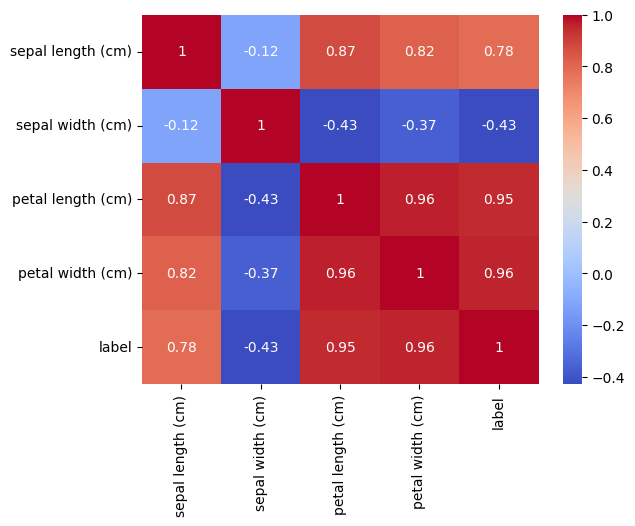

In [3]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Correlation between variables using correlation matrix:
From the correlation matrix above we observe that there is a reasonable correlation among the variables and thus principal component analysis will be used to extract features which form the potential classifiers of the flower species.

Now we are going to perform PCA step by step.

### Step 1: **Data standardization**  

Compute the mean as follows for each variables as
$$
\begin{align*}
\text{Mean} &= \bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i \
\end{align*}
$$
$$
\begin{align*}
\text{Variance} &= \sigma^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2
\end{align*}
$$
Where $X_{i}$ represent the $i^{th}$ variable in the data set.
 To standardize a variable X using its mean ($\bar{X}$) and standard deviation ($\sigma$):

\begin{align*}
\text{Standardized }X &= \frac{X - \bar{X}}{\sigma}
\end{align*}

In this code, $\bar{X}$ represents the sample mean of the variable X, $\sigma$ represents the sample standard deviation of X, and X represents the original unstandardized variable. The resulting standardized variable has a mean of 0 and a standard deviation of 1.




In [4]:
# Compute mean
def mean(X): 
  return np.mean(X,axis=0)

# Compute Standerd diviation
def std(X):
  return np.std(X, axis = 0,ddof=1)

# Standardize Data
def Standardize_data(X):
  return (X-mean(X))/std(X)

X_std = Standardize_data(X=X)

### Step 2: **Compute the covariance matrix**  

Determine the covariance matrix of the data set

$$\text{Cov}(X_i,X_j) = \frac{1}{n-1}\sum_{k=1}^{n}(X_{i}^{k}-\bar{X}i)(X_{j}^{k}-\bar{X}_j)$$


\begin{equation*}
\mathbf{S} = \frac{1}{n-1}\mathbf{X}^\top\mathbf{X},
\end{equation*}

where $\mathbf{X}$ is the $n \times p$ matrix of standardized data, and $\mathbf{S}$ is the $p \times p$ sample covariance matrix. The $(i,j)$th entry of $\mathbf{S}$ is given by

\begin{equation*}
s_{i,j} = \frac{1}{n-1}\sum_{k=1}^{n} x_{k,i}x_{k,j},
\end{equation*}

where $x_{k,i}$ and $x_{k,j}$ are the $i$th and $j$th standardized variables, respectively, for the $k$th observation.


It is important to note that the covariance matrix is a square, postive definate ,symmetric matric of dimension p by p where p is the number of variables


In [5]:
# Compute covariance matrix
def covariance(X):
  n = X.shape[0]
  return (1/(n-1))*(X.T@X)

Cov_mat = covariance(X=X_std)
print(Cov_mat)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


### Step 3: **Compute the eigenvalue and eigenvector of the covariance matrix**
  
Compute eigen values and standardised eigen vectors of the covariance matrix.


Let $A$ be the covariance matrix of a dataset $X$, then the eigenvalue equation is given by:

\begin{equation*}
A\mathbf{v} = \lambda \mathbf{v}
\end{equation*}

where $\mathbf{v}$ is the eigenvector of $A$, and $\lambda$ is the corresponding eigenvalue.

To find the eigenvalues and eigenvectors, we can solve this equation using the characteristic polynomial of $A$:

\begin{equation*}
\det(A - \lambda I) = 0
\end{equation*}

where $I$ is the identity matrix of the same size as $A$.

Solving for $\lambda$ gives the eigenvalues, and substituting each eigenvalue back into the equation

 $$A\mathbf{v} = \lambda \mathbf{v}$$

  gives the corresponding eigenvectors.


In [6]:
# Compute the eigenvalue and eigenvector of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(Cov_mat) 

print(eigen_values)
print(eigen_vectors)

[2.91849782 0.91403047 0.14675688 0.02071484]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Step 4: **Sort eigenvectors V = [v₁, ..., v_d] by descending eigenvalues**


In [7]:
print(eigen_values)
idx = np.array([np.abs(i) for i in eigen_values]).argsort()[::-1]
print(idx)

print("---------------------------------------------------")

eigen_values_sorted = eigen_values[idx]
eigen_vectors_sorted = eigen_vectors.T[:,idx]

print(eigen_vectors_sorted)

[2.91849782 0.91403047 0.14675688 0.02071484]
[0 1 2 3]
---------------------------------------------------
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]



####   Choose the number of components that will be the number of dimensions for the new feature subspace  

*   To be able to visualize our data on the new subspace we will choose 2  
*   Retain at least 95% percent from the cumulative explained variance

In [8]:
explained_variance = [(i / sum(eigen_values))*100 for i in eigen_values_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


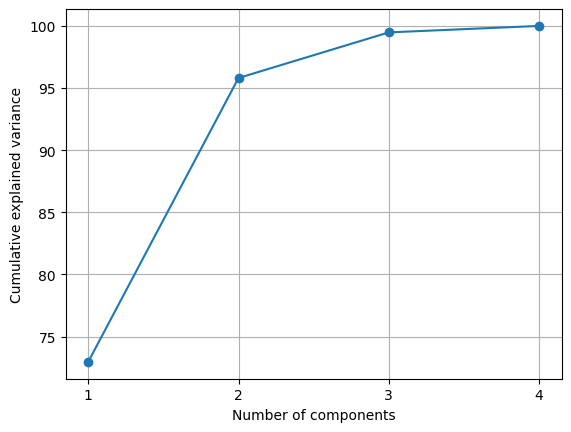

In [9]:
plt.plot(np.arange(1,X.shape[1]+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,X.shape[1]+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.grid()
plt.show()

### Step 5 **Form projection matrix**
From the graph above we can see that with only 2 number of components we can explain 95.81 variance. Hence we can reduce the dimention to 2

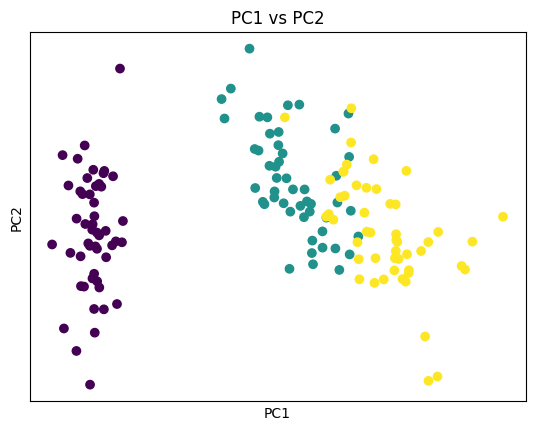

In [10]:
# Get our projection matrix
k = 2
V = eigen_vectors_sorted[:k, :] # Projection matrix


X_proj = X_std.dot(V.T)
X_proj.shape

plt.title(f"PC1 vs PC2")
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()

## PCA Class
Here we have combined all that we have discussed above in to a class. You can see the usage below

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96244541  95.8132072   99.48212909 100.        ]
Reconstruction MSE: 0.0355


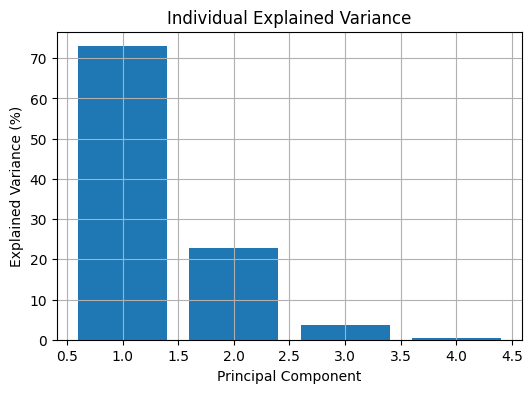

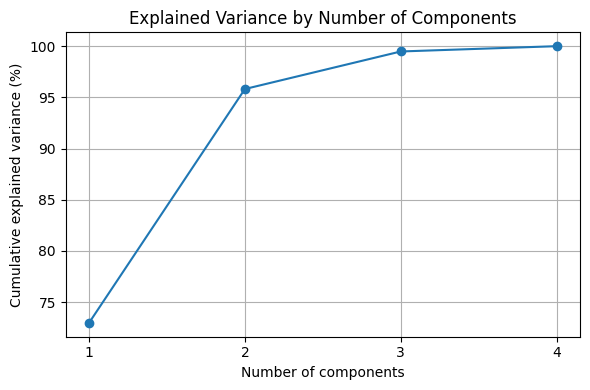

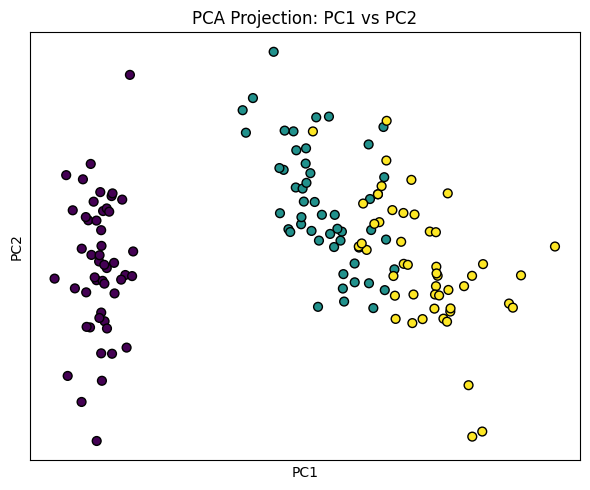

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from ek_ml_package.pca import PCA
from sklearn.datasets import load_iris

# Load sample dataset
data = load_iris()
X = data.data
y = data.target

# Instantiate and fit PCA
pca = PCA(2)
pca.fit(X)

# Transform data
X_proj = pca.transform()

# Print variance information
print('Explained variance: {}'.format(pca.explained_variance))
print('Cumulative explained variance: {}'.format(pca.cum_explained_variance))

# Reconstruct and evaluate
X_std_reconstructed = pca.inverse_transform()
X_reconstructed = pca.unstandardize(X_std_reconstructed)

# Reconstruction error
mse = np.mean((X - X_reconstructed)**2)
print(f"Reconstruction MSE: {mse:.4f}")

# Plot Individual Explained Variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(pca.explained_variance) + 1), pca.explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Individual Explained Variance")
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(pca.cum_explained_variance) + 1), pca.cum_explained_variance, '-o')
plt.xticks(np.arange(1, X.shape[1] + 1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2D PCA projection
plt.figure(figsize=(6, 5))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title("PCA Projection: PC1 vs PC2")
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.grid(True)
plt.tight_layout()
plt.show()
